In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert it into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Display the first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# Define X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape


((353, 10), (89, 10))

In [4]:
# Initialize AdaBoost Regressor with default parameters
ada_model = AdaBoostRegressor(random_state=42)

# Train the model on the training data
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)


In [5]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 3019.3647335500605
R-squared (R²): 0.4301098049153773


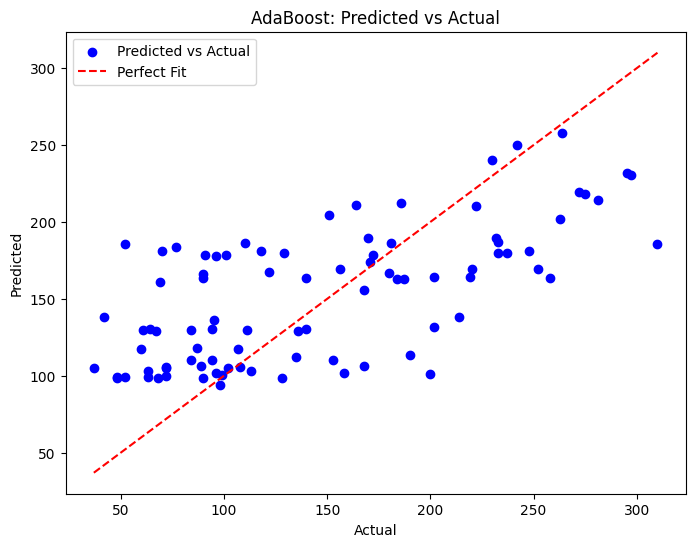

In [6]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('AdaBoost: Predicted vs Actual')
plt.legend()
plt.show()


In [7]:
# Initialize lists to store results
n_estimators_values = [50, 100, 200, 300]
learning_rate_values = [0.01, 0.05, 0.1, 0.2]
loss_values = ['linear', 'square', 'exponential']

mse_estimators_results = []
mse_lr_results = []
mse_loss_results = []

# Loop through different n_estimators values
for n in n_estimators_values:
    ada_model = AdaBoostRegressor(n_estimators=n, random_state=42)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_estimators_results.append(mse)

# Loop through different learning_rate values
for lr in learning_rate_values:
    ada_model = AdaBoostRegressor(learning_rate=lr, random_state=42)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_lr_results.append(mse)

# Loop through different loss values
for loss in loss_values:
    ada_model = AdaBoostRegressor(loss=loss, random_state=42)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_loss_results.append(mse)

# Print the results for n_estimators
print("n_estimators Results:")
for i, n in enumerate(n_estimators_values):
    print(f"n_estimators={n}: MSE = {mse_estimators_results[i]}")

# Print the results for learning_rate
print("\nLearning Rate Results:")
for i, lr in enumerate(learning_rate_values):
    print(f"learning_rate={lr}: MSE = {mse_lr_results[i]}")

# Print the results for loss
print("\nLoss Results:")
for i, loss in enumerate(loss_values):
    print(f"loss={loss}: MSE = {mse_loss_results[i]}")


n_estimators Results:
n_estimators=50: MSE = 3019.3647335500605
n_estimators=100: MSE = 3151.168986976182
n_estimators=200: MSE = 3084.4906645445167
n_estimators=300: MSE = 3084.4906645445167

Learning Rate Results:
learning_rate=0.01: MSE = 2719.8493250091265
learning_rate=0.05: MSE = 2782.1648171236593
learning_rate=0.1: MSE = 2804.059983656589
learning_rate=0.2: MSE = 2815.053308038012

Loss Results:
loss=linear: MSE = 3019.3647335500605
loss=square: MSE = 2882.778146540468
loss=exponential: MSE = 2926.540744712563


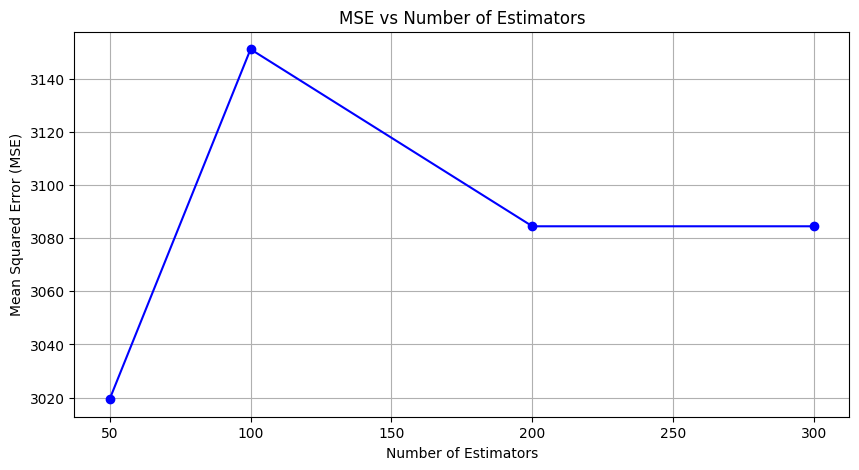

In [8]:
# Plot MSE for different n_estimators values
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, mse_estimators_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


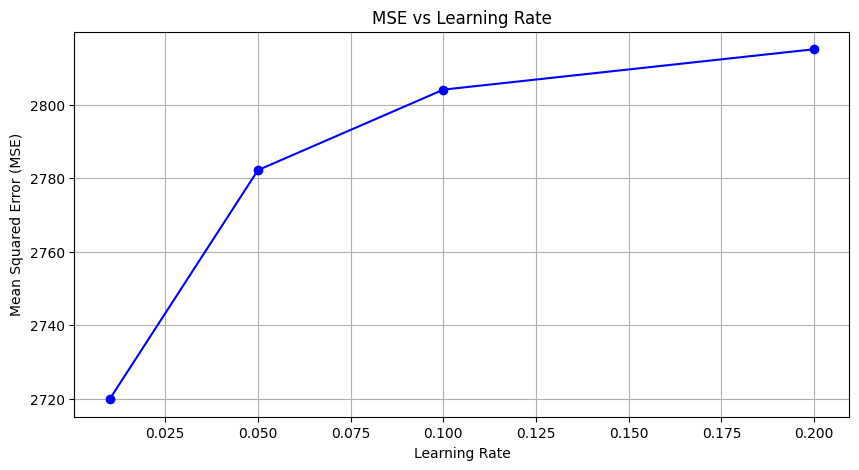

In [9]:
# Plot MSE for different learning_rate values
plt.figure(figsize=(10, 5))
plt.plot(learning_rate_values, mse_lr_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


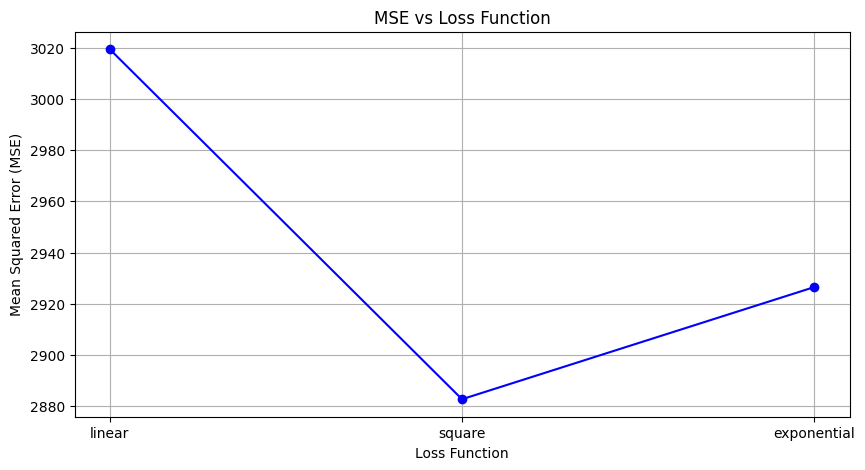

In [10]:
# Plot MSE for different loss values
plt.figure(figsize=(10, 5))
plt.plot(loss_values, mse_loss_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()
